
# Training YOLOv8 for Early Fire Detection on a FLAME Aerial Dataset

## Steps

- Installation and Checks
- Custom Training
- Validate Custom Model
- Inference with Custom Model


## Installation and Checks

Use `nvidia-smi` command to check access to GPU. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [22]:
!nvidia-smi

Wed Nov 15 23:48:04 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:01:00.0 Off |                  N/A |
| 30%   26C    P8              12W / 350W |  17627MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Install YOLOv8 via pip. Installs through ultralytics library because YOLOv8 is a framework within the library. This notebook was last compatibility tested with version **YOLOv8.0.20**.

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Setup complete ✅ (20 CPUs, 62.6 GB RAM, 84.4/195.8 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

Prepare custom images by labeling with bounding box coordinates as txt files in the format '0 {xmin} {ymin} {xmax} {ymax}'. The values are normalized to 0 and are floating point numbers. 

Then, split data into 3 sets: training, testing, and validation. Each set should have a images folder and a labels folder.

Lastly, create a configuration .yaml file as a directory for the model, and adjust epochs and images size as needed.

In [29]:
!yolo task=detect mode=train model=yolov8s.pt data="/home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/data.yaml" epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

View the results of training with a confusion matrix, loss function metrics, and a batch of images.

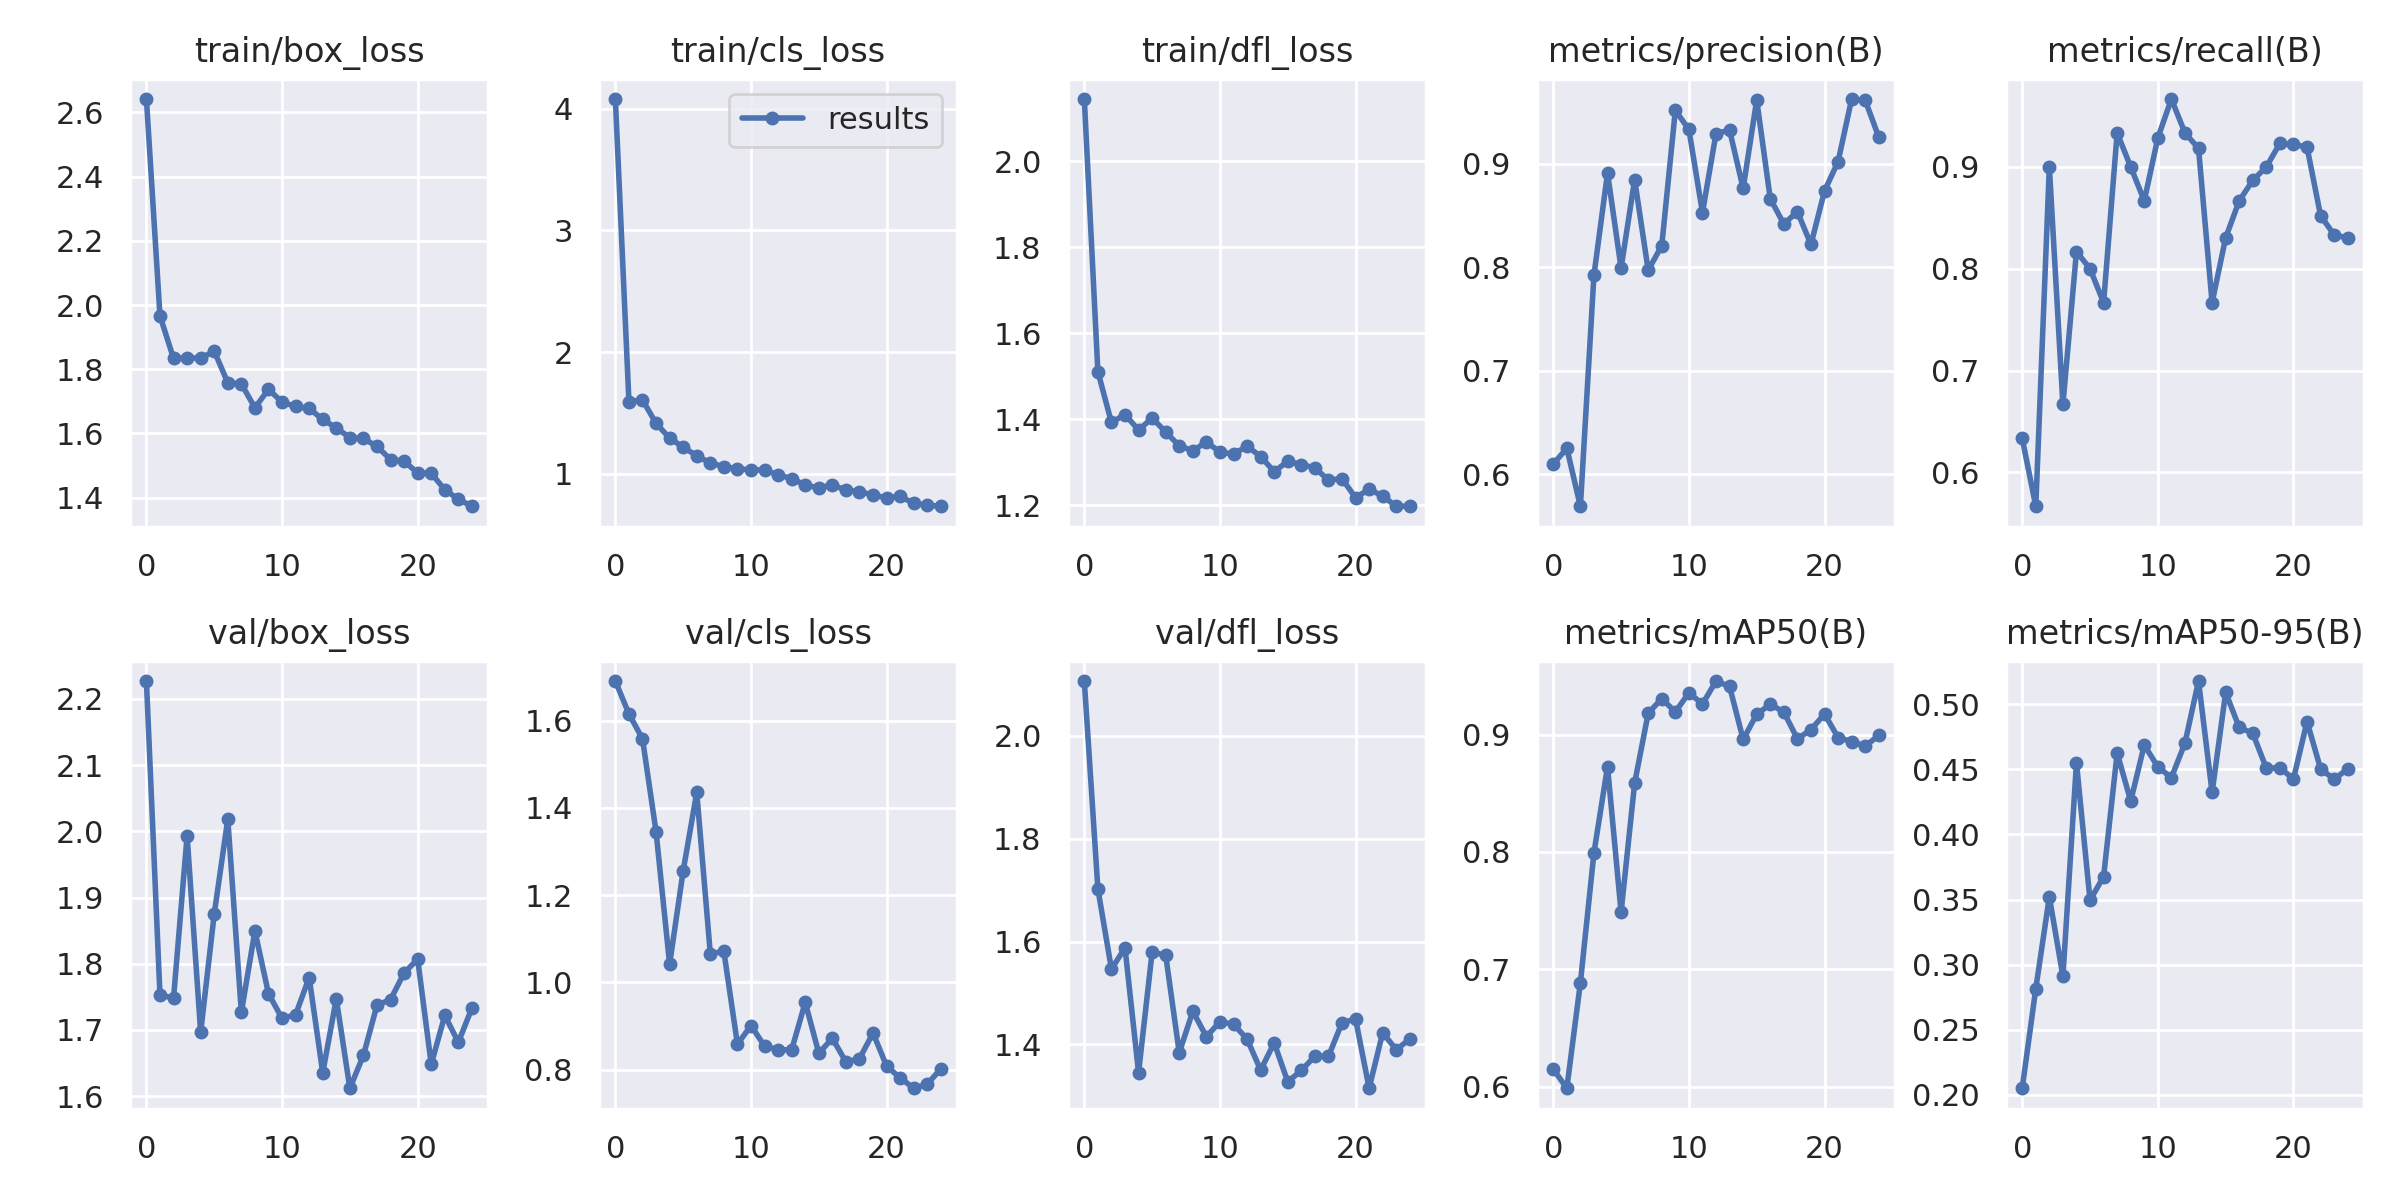

In [47]:
Image(filename=f'./runs/detect/train9/results.png', width=1000)

## Validate Custom Model

Validate the model with the weights from the training data.

In [35]:
!yolo task=detect mode=val model=./runs/detect/train10/weights/best.pt data="/home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/data.yaml"

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20         30      0.932      0.918      0.941      0.512
Speed: 1.7ms pre-process, 26.5ms inference, 0.0ms loss, 4.1ms post-process per image


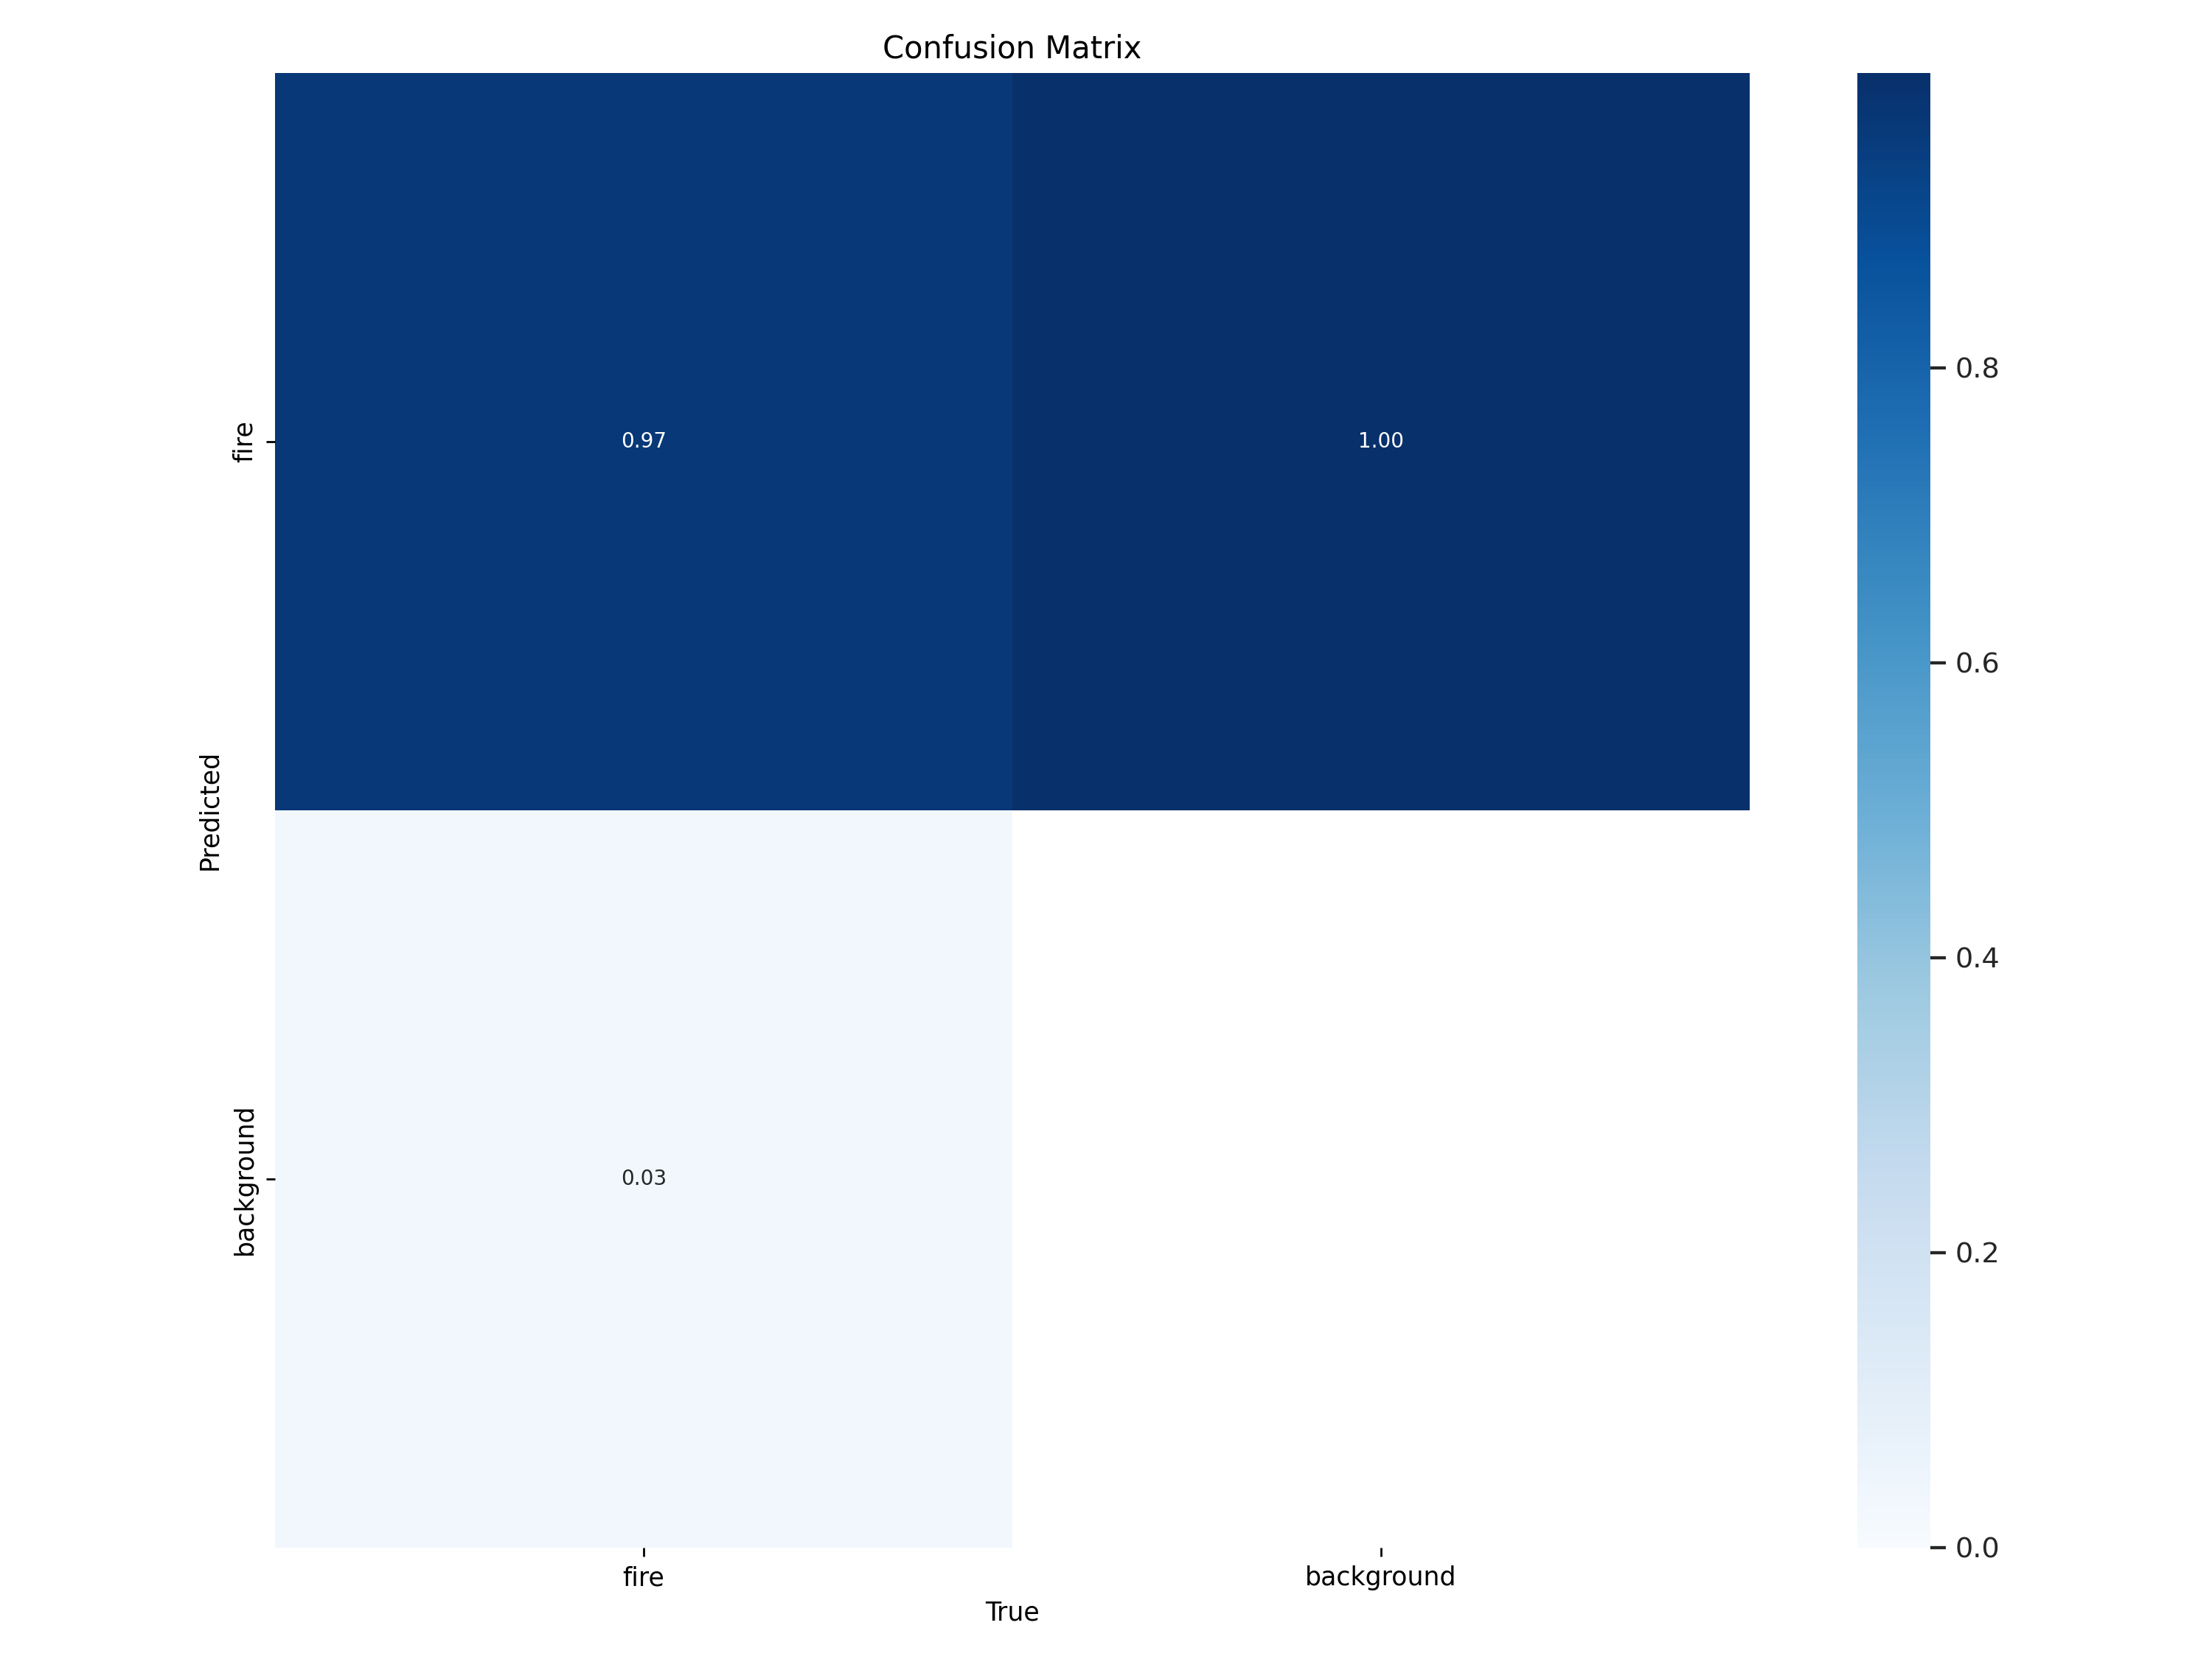

In [48]:
Image(filename=f'./runs/detect/val8/confusion_matrix.png', width=800)

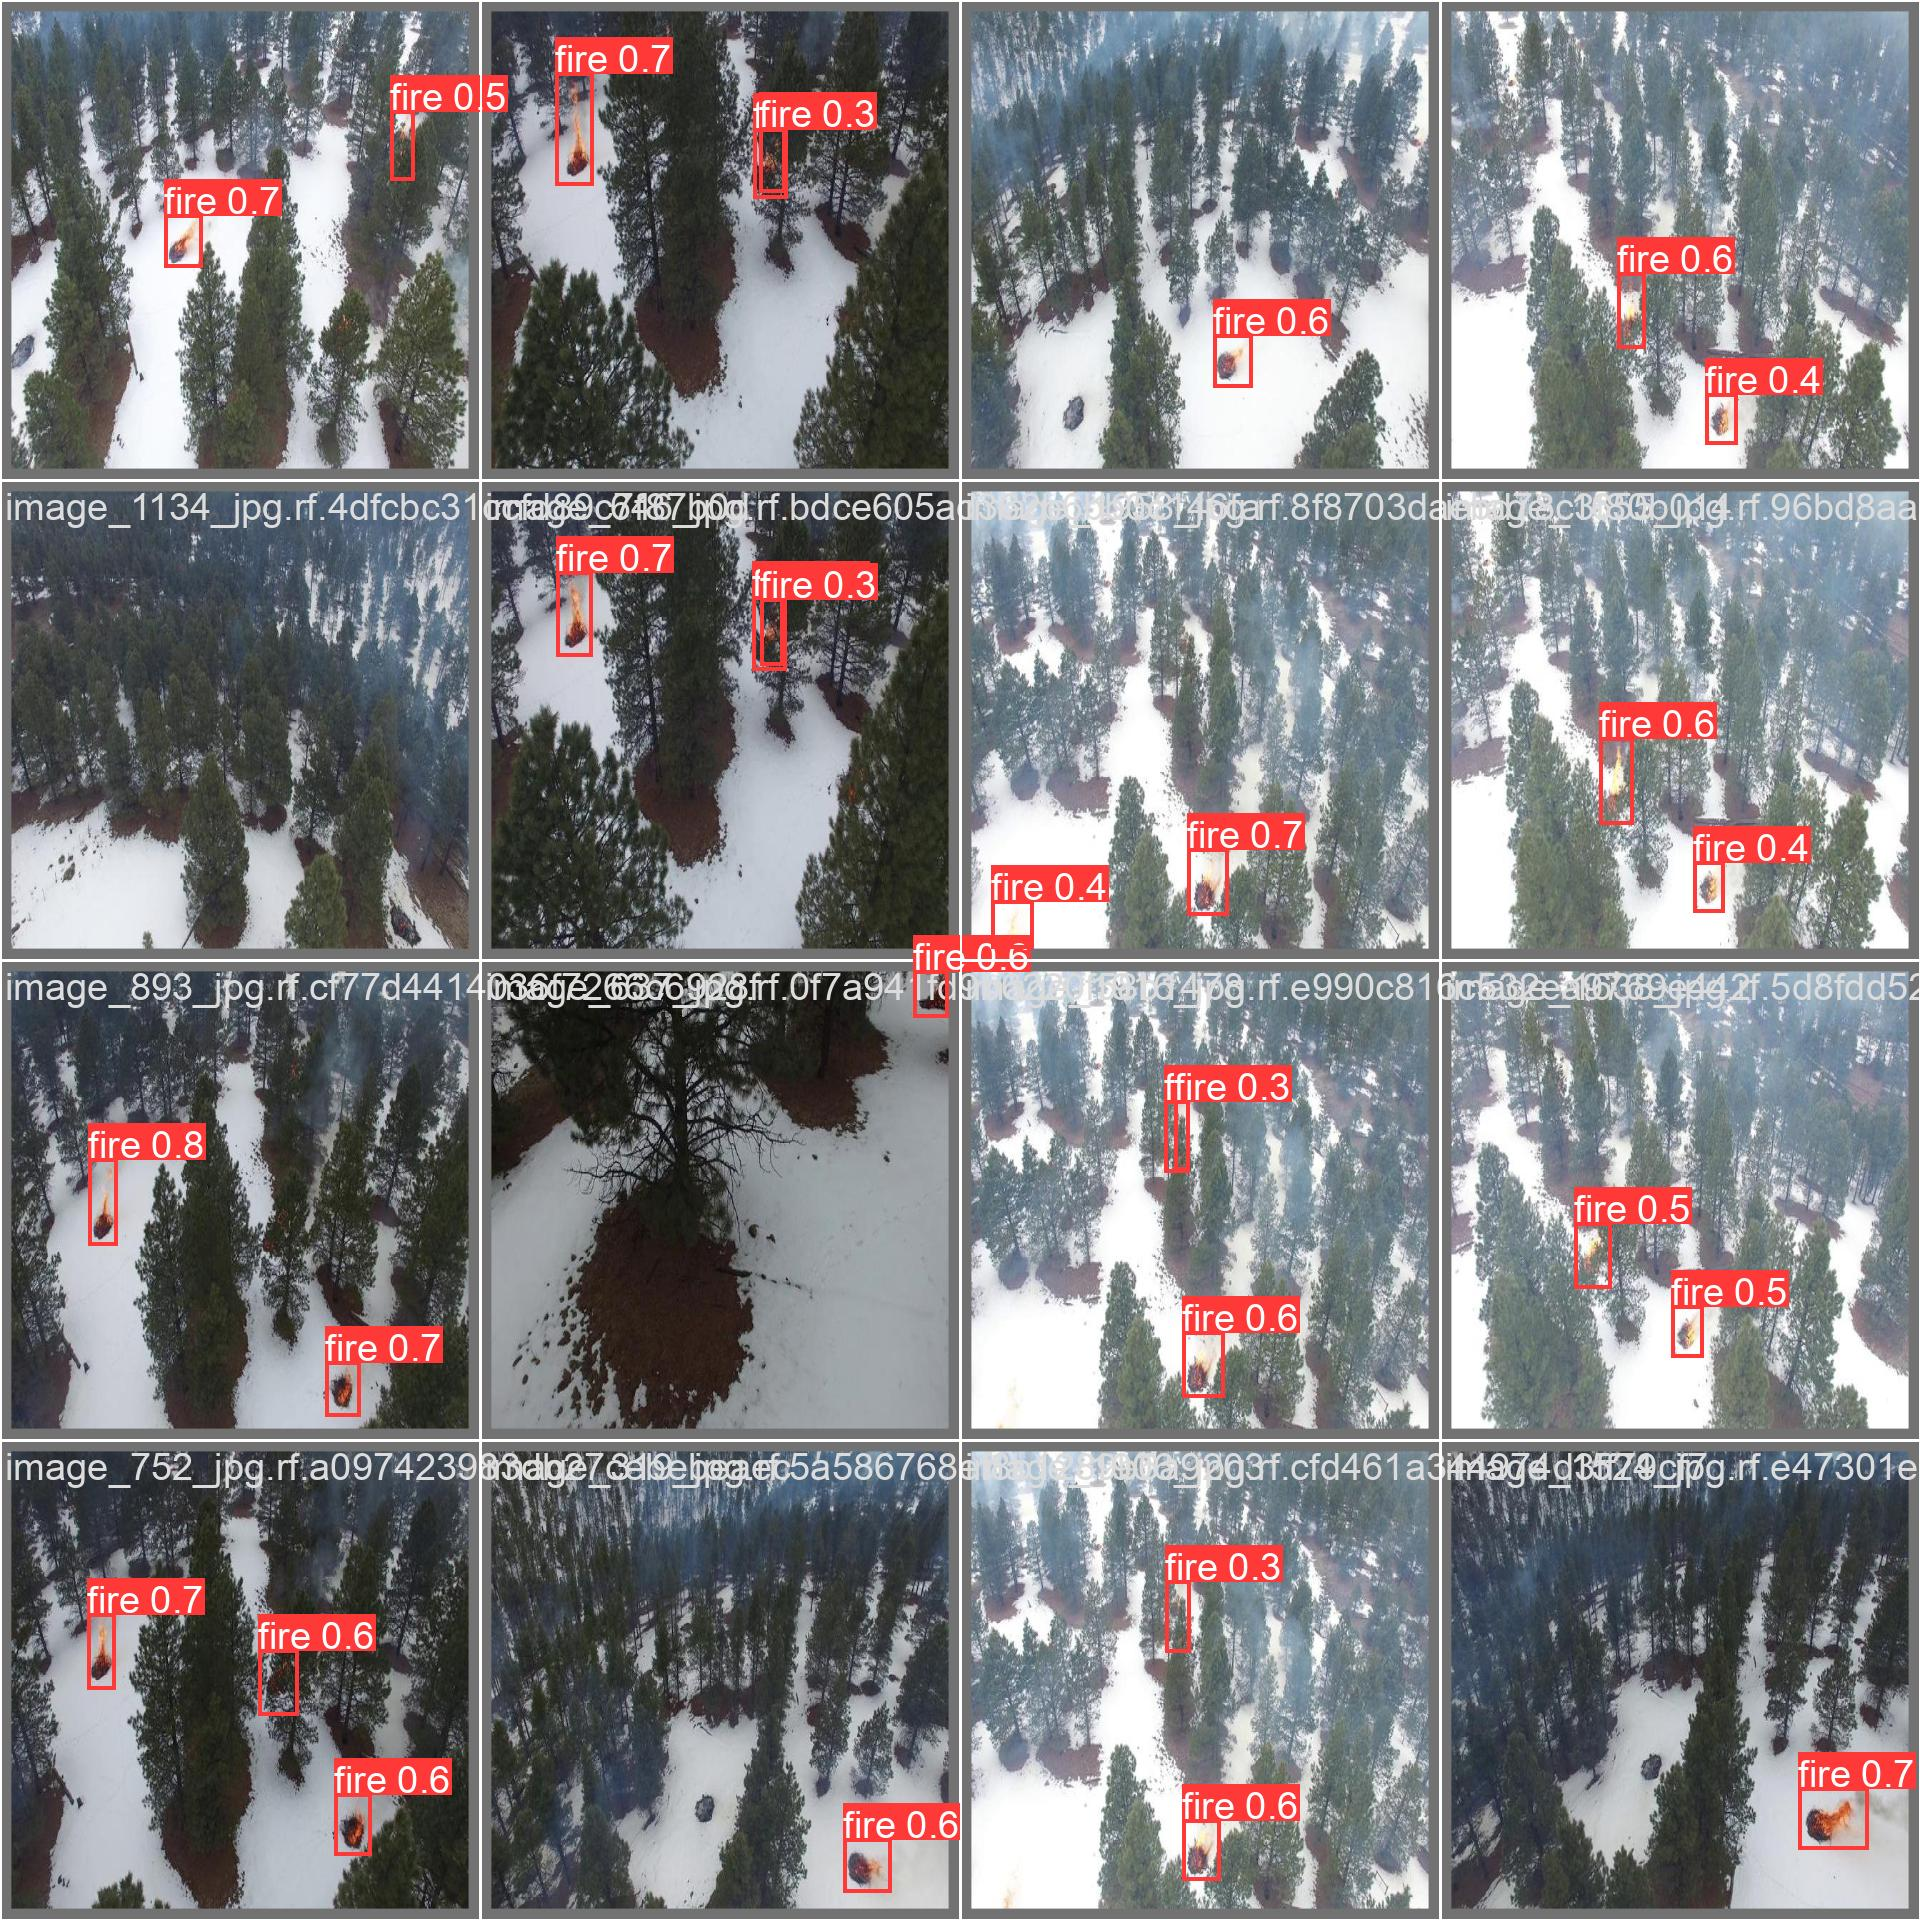

In [49]:
Image(filename=f'./runs/detect/val8/val_batch0_pred.jpg', width=1000)

## Inference with Custom Model

Infer by running on testing data and the same weights as above.

In [36]:
!yolo task=detect mode=predict model=./runs/detect/train10/weights/best.pt conf=0.25 source="/home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/test/images" save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/test/images/image_1015_jpg.rf.d19feec94279b2413ce52f4a71b6ac75.jpg: 640x640 2 fires, 4.4ms
image 2/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/test/images/image_1076_jpg.rf.d4b0ab52bd7dad678d3a32997870fc1f.jpg: 640x640 1 fire, 4.4ms
image 3/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/test/images/image_1151_jpg.rf.289850d7267922a7b7e1471760edd2fd.jpg: 640x640 2 fires, 4.4ms
image 4/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-Fire-and-Smoke-Detection/datasets/flame_annotated_v3i/test/images/image_1245_jpg.rf.aa32f2708cc3c46fde66573fe18d66c1.jpg: 640x640 3 fires, 4.4ms
image 5/20 /home/calvinzhou

Take a look at few results.

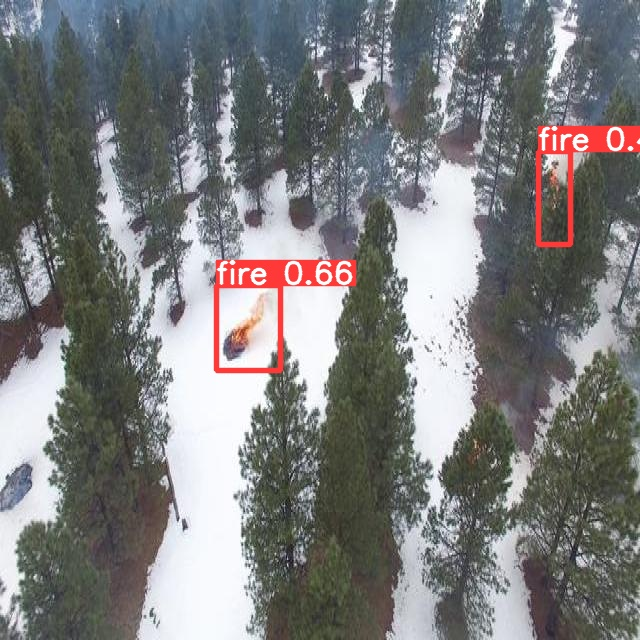

./runs/detect/predict8/image_1151_jpg.rf.289850d7267922a7b7e1471760edd2fd.jpg




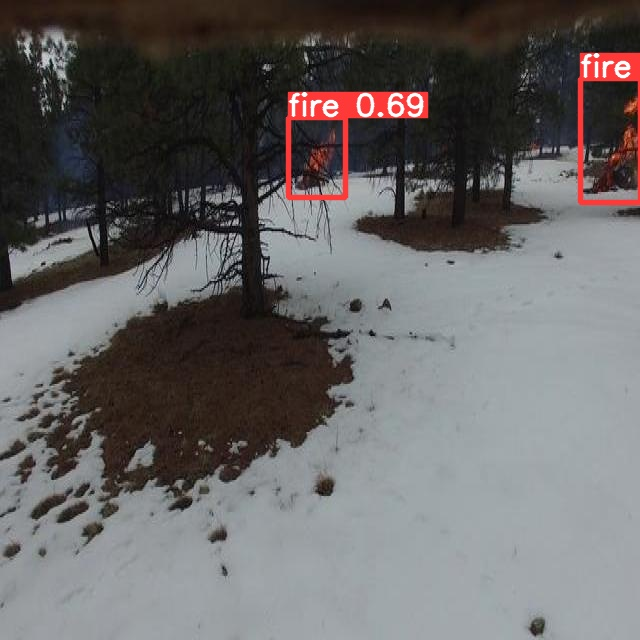

./runs/detect/predict8/image_168_jpg.rf.efccc0795edb0cc2963b02f277acd083.jpg




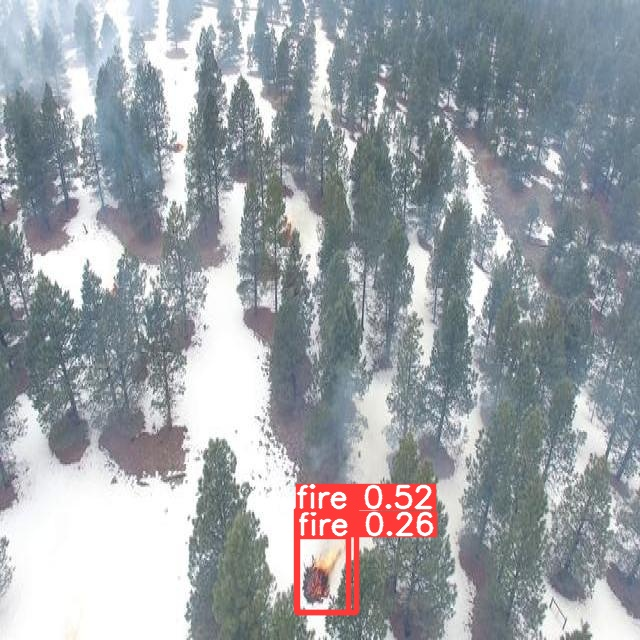

./runs/detect/predict8/image_1779_jpg.rf.f7fd5f1b535337173f446b1ae45993b9.jpg




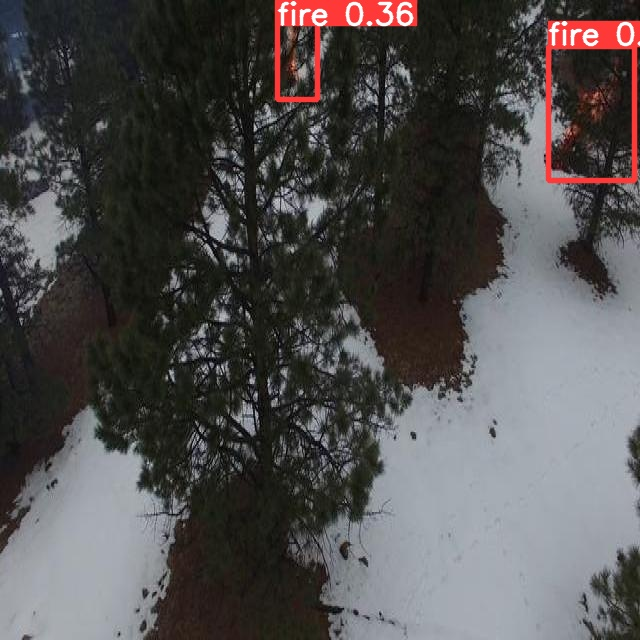

./runs/detect/predict8/image_524_jpg.rf.1f8ce0a73787d3b5578f1b811b564ff5.jpg




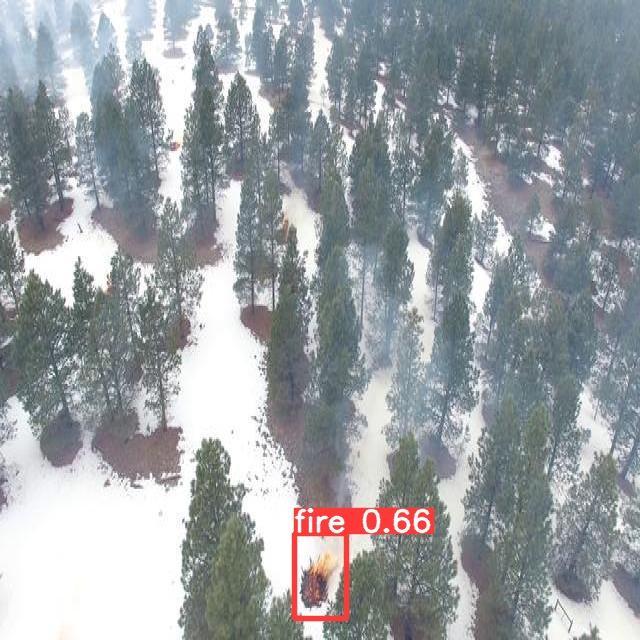

./runs/detect/predict8/image_1851_jpg.rf.57d1a93e3dd704830f72e1fcee86b48c.jpg




In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/predict8/*.jpg')[:5]:
      display(Image(filename=image_path, width=800))
      print(image_path)
      print("\n")